### Buy and Hold
1. 구매 후 일정기간 지나면 판매

In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("../csv/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...,...
9710,2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
9711,2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
9712,2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0
9713,2019-06-21,198.800003,200.850006,198.149994,198.779999,198.779999,47735300.0


In [24]:
# 결측치와 무한대의 값이 존재하는지 확인
df = df.loc[~ df.isin([np.nan, np.inf, -np.inf]).any(axis = 'columns')]

In [25]:
df.dropna(axis = 0)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...,...
9710,2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
9711,2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
9712,2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0
9713,2019-06-21,198.800003,200.850006,198.149994,198.779999,198.779999,47735300.0


In [26]:
# df에 있는 수정종가 부분만 추출하여 데이터 프레임의 형태로
# case 1
df[['Adj Close']]
# case 2
price_df = df.loc[:, ['Adj Close']]

<Axes: >

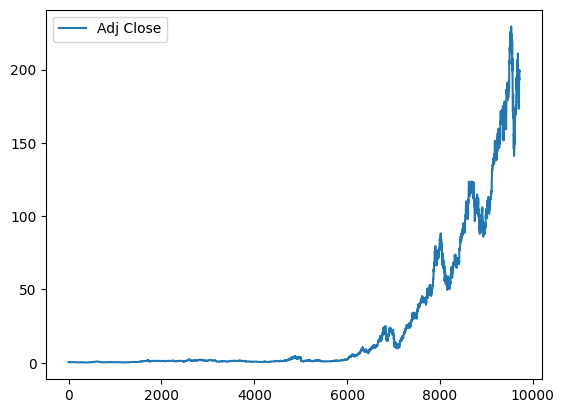

In [27]:
# 수정종가를 그래프로 표시
price_df.plot()

In [28]:
# 파생변수 생성(일별 수익률)
# 일별 수익률 = (오늘의 종가 - 전날의 종가) / 전날의 종가
# case 1
price_df['Adj Close'].diff() / price_df['Adj Close'].shift()
# case 2
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [29]:
price_df.head()

,Adj Close,daily_rtn
0,0.410525,NaN
1,0.389106,-0.052175
2,0.360548,-0.073394
3,0.369472,0.024751
4,0.380182,0.028987


In [30]:
# 일별 수익률을 가지고 총 수익률을 구하려면?

test_df = price_df.iloc[500 : 600]

In [31]:
test_df

,Adj Close,daily_rtn
502,0.472996,-0.022142
503,0.449793,-0.049055
504,0.417665,-0.071428
505,0.408740,-0.021369
506,0.405170,-0.008734
...,...,...
597,0.694322,-0.046570
598,0.713956,0.028278
599,0.706817,-0.009999
600,0.713956,0.010100


In [32]:
rtn = 1

for i in test_df.index:
    rtn = rtn * (1 + test_df.loc[i, 'daily_rtn'])
print(rtn)

1.4907733209842349


In [33]:
(1 + test_df['daily_rtn']).cumprod()

502    0.977858
503    0.929889
504    0.863469
505    0.845017
506    0.837637
         ...   
597    1.435422
598    1.476012
599    1.461253
600    1.476012
601    1.490773
Name: daily_rtn, Length: 100, dtype: float64

In [34]:
# 종가를 기준으로 수익률 계산
price_df['st_rtn'] = (1 + price_df['daily_rtn']).cumprod()

In [35]:
price_df.head()

,Adj Close,daily_rtn,st_rtn
0,0.410525,NaN,NaN
1,0.389106,-0.052175,0.947825
2,0.360548,-0.073394,0.878261
3,0.369472,0.024751,0.899999
4,0.380182,0.028987,0.926087


In [36]:
# 첫날의 종가와 마지막 날의 종가
first = price_df.iloc[0, 0]
last = price_df.iloc[-1, 0]
print(first, last)

0.410525 199.169998


In [37]:
print(last / first)

485.15924243346933


### Buy and Hold 함수로 생성
1. 매개변수는 1개(데이터프레임)
2. 결측치, 무한대를 제거
3. 수정종가만 있는 데이터프레임으로 변경
4. 일별 수익률 파생변수 생성
5. 누적 수익률 파생변수 생성
6. 데이터 프레임을 리턴

In [38]:
df = pd.read_csv("../csv/AAPL.csv")

In [39]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...,...
9710,2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
9711,2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
9712,2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0
9713,2019-06-21,198.800003,200.850006,198.149994,198.779999,198.779999,47735300.0


In [40]:
def buyandhold(df, column):
    # 결측치, 무한대 제외
    df = df.loc[~df.isin([np.nan, np.inf, -np.inf]).any(axis = 'columns')]
    # 수정 종가만 있는 데이터 프레임으로 변경
    df = df[[column]]
    # 일별 수익률 파생변수 생성
    df['daily_rtn'] = df[column].pct_change()
    # 누적 수익률 파생 변수 생성
    df['st_rtn'] = (1 + df['daily_rtn']).cumprod()
    # 데이터프레임 리턴
    return df

In [41]:
buyandhold(df, 'Adj Close')

,Adj Close,daily_rtn,st_rtn
0,0.410525,NaN,NaN
1,0.389106,-0.052175,0.947825
2,0.360548,-0.073394,0.878261
3,0.369472,0.024751,0.899999
4,0.380182,0.028987,0.926087
...,...,...,...
9710,198.449997,0.023518,483.405388
9711,197.869995,-0.002923,481.992558
9712,199.460007,0.008036,485.865677
9713,198.779999,-0.003409,484.209242


In [42]:
df = pd.read_csv("../csv/AMZN.csv", index_col = 'Date')

In [43]:
df.index

Index(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
       '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28', '1997-05-29',
       ...
       '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17',
       '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24'],
      dtype='object', name='Date', length=5563)

In [44]:
df.index = pd.to_datetime(df.index, format = "%Y-%m-%d")

In [45]:
from datetime import datetime

In [46]:
start = '20080101'
end = '20150101'
start = datetime.strptime(start, '%Y%m%d').isoformat()
end = datetime.strptime(end, '%Y%m%d').isoformat()
start

'2008-01-01T00:00:00'

In [47]:
df.loc[start:end]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,95.349998,97.430000,94.699997,96.250000,96.250000,13858700
2008-01-03,96.059998,97.250000,94.519997,95.209999,95.209999,9122500
2008-01-04,93.260002,93.400002,88.500000,88.790001,88.790001,10270000
2008-01-07,88.620003,90.570000,85.470001,88.820000,88.820000,9981600
2008-01-08,87.550003,91.830002,86.930000,87.879997,87.879997,12283300
...,...,...,...,...,...,...
2014-12-24,306.380005,307.000000,302.880005,303.029999,303.029999,1513800
2014-12-26,305.000000,310.779999,303.809998,309.089996,309.089996,2893800
2014-12-29,307.850006,314.269989,306.579987,312.040009,312.040009,3009000


In [48]:
import buyandhold

# 라이브러리 리로드
import imp

imp.reload(buyandhold)

C:\Users\이은진\AppData\Local\Temp\ipykernel_15660\1638390954.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'buyandhold' from 'c:\\Users\\이은진\\OneDrive\\문서\\python\\230412\\buyandhold.py'>

In [49]:
df = pd.read_csv('../csv/BND.csv', index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.070000,75.260002,75.000000,75.239998,51.523693,35000
2007-04-11,75.160004,75.290001,75.029999,75.040001,51.386742,87700
2007-04-12,75.059998,75.080002,74.959999,75.029999,51.379879,78100
2007-04-13,75.040001,75.070000,74.849998,74.910004,51.297688,18000
2007-04-16,74.989998,74.989998,74.940002,74.980003,51.345627,52700


In [50]:
buyandhold.bnh(df, 'Adj Close', '20100101', '20150101')

,Adj Close,daily_rtn,st_rtn
Date,,,
2010-01-04,60.611969,NaN,NaN
2010-01-05,60.789135,0.002923,1.002923
2010-01-06,60.766037,-0.000380,1.002542
2010-01-07,60.719822,-0.000761,1.001779
2010-01-08,60.781410,0.001014,1.002796
...,...,...,...
2014-12-24,73.073853,0.000366,1.205601
2014-12-26,73.136253,0.000854,1.206631
2014-12-29,73.260918,0.001705,1.208687


In [51]:
# 라이브러리 설치
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import yfinance as yf

In [53]:
df = yf.download('003490.ks', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [54]:
buyandhold.bnh(df)

,Close,daily_rtn,st_rtn
Date,,,
2010-01-04,54898.703125,NaN,NaN
2010-01-05,56296.125000,0.025455,1.025455
2010-01-06,56296.125000,0.000000,1.025455
2010-01-07,53900.546875,-0.042553,0.981818
2010-01-08,54199.992188,0.005556,0.987273
...,...,...,...
2019-12-23,29100.000000,0.046763,0.530067
2019-12-24,28000.000000,-0.037801,0.510030
2019-12-26,27900.000000,-0.003571,0.508209
